# **Build a Student Retention Model with XGBoost and Create a Report of Actionable Insights**

* Its about the  data approach student achievement in secondary education of two Portuguese schools. 
* The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. 
* Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). 
* In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. 

* Important note: the target attribute G3 has a strong correlation with attributes G2 and G1.The cause isn G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. 
* It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

## Import necessaries libraries

In [1]:
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns
 

## Download Data Set

Source: https://archive.ics.uci.edu/ml/datasets/student+performance

In [3]:
student_por_df = pd.read_csv('student-por.csv', sep=';')
student_por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


#Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 

* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
* sex - student's sex (binary: 'F' - female or 'M' - male) 
* age - student's age (numeric: from 15 to 22) 
*  address - student's home address type (binary: 'U' - urban or 'R' - rural) 
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
* guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
* failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
* schoolsup - extra educational support (binary: yes or no) 
* famsup - family educational support (binary: yes or no) 
*  paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
* activities - extra-curricular activities (binary: yes or no) 
* nursery - attended nursery school (binary: yes or no) 
* higher - wants to take higher education (binary: yes or no) 
*  internet - Internet access at home (binary: yes or no) 
* romantic - with a romantic relationship (binary: yes or no) 
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
* freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
* goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
* health - current health status (numeric: from 1 - very bad to 5 - very good) 
* absences - number of school absences (numeric: from 0 to 93) 

#these grades are related with the course subject, Math or Portuguese: 
* G1 - first period grade (numeric: from 0 to 20) 
* G2 - second period grade (numeric: from 0 to 20) 
* G3 - final grade (numeric: from 0 to 20, output target)

In [4]:
student_por_df['G3'].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

In [5]:
student_por_df.shape

(649, 33)

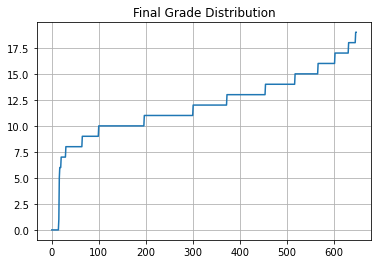

In [6]:
plt.plot(sorted(student_por_df['G3']))
plt.title('Final Grade Distribution')
plt.grid()

In [9]:
student_math_df = pd.read_csv('student-mat.csv', sep=';')
student_math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
student_por_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [11]:
student_math_df.shape

(395, 33)

**Exploration and feature engineering**

In [12]:
# find all non-numerical data
non_mueric_features = [feat for feat in list(student_por_df) if feat not in list(student_por_df._get_numeric_data())]
for feat in non_mueric_features:
    print(feat, ':', set(student_por_df[feat]))

school : {'MS', 'GP'}
sex : {'F', 'M'}
address : {'R', 'U'}
famsize : {'GT3', 'LE3'}
Pstatus : {'A', 'T'}
Mjob : {'health', 'services', 'teacher', 'at_home', 'other'}
Fjob : {'health', 'teacher', 'services', 'at_home', 'other'}
reason : {'reputation', 'other', 'course', 'home'}
guardian : {'mother', 'father', 'other'}
schoolsup : {'no', 'yes'}
famsup : {'no', 'yes'}
paid : {'no', 'yes'}
activities : {'no', 'yes'}
nursery : {'no', 'yes'}
higher : {'no', 'yes'}
internet : {'no', 'yes'}
romantic : {'no', 'yes'}


In [13]:
for feat in non_mueric_features:
    dummies = pd.get_dummies(student_por_df[feat]).rename(columns=lambda x: feat + '_' + str(x))
    student_por_df = pd.concat([student_por_df, dummies], axis=1)
    
student_por_df = student_por_df[[feat for feat in list(student_por_df) if feat not in non_mueric_features]]

In [14]:
student_por_df.shape

(649, 59)

In [15]:
student_por_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


# **Modeling with XGBoost**

In [17]:
pip install XGBoost

Note: you may need to restart the kernel to use updated packages.


In [19]:
# create an xgboost model
# run simple xgboost classification model and check 
# prep modeling code
outcome = 'G3'
features = [feat for feat in list(student_por_df) if feat not in outcome]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(student_por_df, 
                                                 student_por_df[outcome], 
                                                 test_size=0.3, 
                                                 random_state=42)


import xgboost  as xgb
xgb_params = {
    'eta': 0.01,
    'max_depth': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'seed' : 0
}

dtrain = xgb.DMatrix(X_train[features], y_train, feature_names = features)
dtest = xgb.DMatrix(X_test[features], y_test, feature_names = features)
evals = [(dtrain,'train'),(dtest,'eval')]
xgb_model = xgb.train (params = xgb_params,
              dtrain = dtrain,
              num_boost_round = 2000,
              verbose_eval=50, 
              early_stopping_rounds = 500,
              evals=evals,
              #feval = f1_score_cust,
              maximize = False)
 

[21:55:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:11.64971	eval-rmse:11.94302
[50]	train-rmse:7.20058	eval-rmse:7.40624
[100]	train-rmse:4.50631	eval-rmse:4.63594
[150]	train-rmse:2.90725	eval-rmse:2.99138
[200]	train-rmse:1.98567	eval-rmse:2.06537
[250]	train-rmse:1.47358	eval-rmse:1.56771
[300]	train-rmse:1.20603	eval-rmse:1.32743
[350]	train-rmse:1.06527	eval-rmse:1.22792
[400]	train-rmse:0.98898	eval-rmse:1.19130
[450]	train-rmse:0.94039	eval-rmse:1.17599
[500]	train-rmse:0.90536	eval-rmse:1.16880
[550]	train-rmse:0.87610	eval-rmse:1.16890
[600]	train-rmse:0.85171	eval-rmse:1.17095
[650]	train-rmse:0.83189	eval-rmse:1.17157
[700]	train-rmse:0.81395	eval-rmse:1.17366
[750]	train-rmse:0.79626	eval-rmse:1.17288
[800]	train-rmse:0.77829	eval-rmse:1.17525
[850]	train-rmse:0.76304	eval-rmse:1.17549
[900]	train-rmse:0.74792	eval-rmse:1.17686
[950]	t

# **Find poor performing students and find out why they are so compared to their peers**

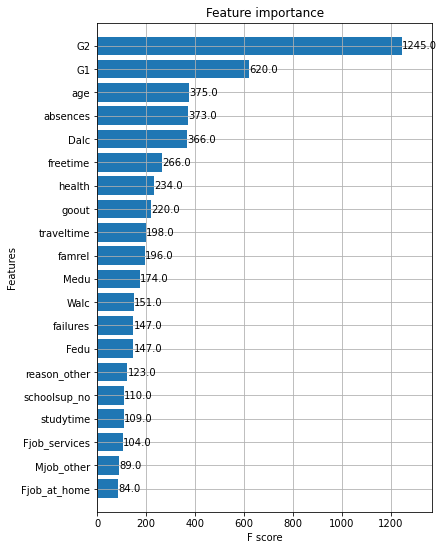

In [20]:
# plot the important features  
fig, ax = plt.subplots(figsize=(6,9))
xgb.plot_importance(xgb_model,  height=0.8, ax=ax, max_num_features=20)

plt.show()

In [21]:
# get dataframe version of important feature for model 
xgb_fea_imp=pd.DataFrame(list(xgb_model.get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
xgb_fea_imp.head(10)

,feature,importance
14,G2,1245.0
13,G1,620.0
0,age,375.0
12,absences,373.0
9,Dalc,366.0
7,freetime,266.0
11,health,234.0
8,goout,220.0
3,traveltime,198.0
6,famrel,196.0


In [22]:
print(xgb_model.predict(dtest)[0:10])

[16.81228  11.550355 17.011883 11.075317 11.513776 16.314234 17.202694
 10.227154 10.89279  10.709687]


In [23]:
key_features = list(xgb_fea_imp['feature'].values[0:40])
key_features

['G2',
 'G1',
 'age',
 'absences',
 'Dalc',
 'freetime',
 'health',
 'goout',
 'traveltime',
 'famrel',
 'Medu',
 'Walc',
 'failures',
 'Fedu',
 'reason_other',
 'schoolsup_no',
 'studytime',
 'Fjob_services',
 'Mjob_other',
 'Fjob_at_home',
 'sex_F',
 'famsup_no',
 'school_GP',
 'guardian_father',
 'romantic_no',
 'Mjob_teacher',
 'Mjob_services',
 'famsize_GT3',
 'higher_no',
 'nursery_no',
 'activities_no',
 'reason_home',
 'reason_reputation',
 'internet_no',
 'reason_course',
 'address_R',
 'schoolsup_yes',
 'paid_no',
 'guardian_mother',
 'Mjob_at_home']

In [24]:
# Take students with a predicted final score of less than 10 over 20
predicted_students_in_trouble = X_test[X_test['G3'] < 10]

# See which feature they landed well below or well above peers
for index, row in predicted_students_in_trouble.iterrows():
    print('Student ID:', index)
    for feat in key_features:
        if row[feat] < student_por_df[feat].quantile(0.25):
            print('\t', 'Below:', feat, row[feat], 'Class:', 
                  np.round(np.mean(student_por_df[feat]),2))
        if row[feat] > student_por_df[feat].quantile(0.75):
            print('\t','Above:', feat, row[feat], 'Class:', 
                  np.round(np.mean(student_por_df[feat]),2))

Student ID: 131
	 Below: G2 9 Class: 11.57
	 Above: absences 10 Class: 3.66
	 Above: goout 5 Class: 3.18
	 Above: failures 3 Class: 0.22
	 Above: Mjob_services 1 Class: 0.21
	 Above: higher_no 1 Class: 0.11
	 Above: reason_reputation 1 Class: 0.22
Student ID: 81
	 Below: G2 9 Class: 11.57
	 Below: age 15 Class: 16.74
	 Below: schoolsup_no 0 Class: 0.9
	 Above: studytime 3 Class: 1.93
	 Above: nursery_no 1 Class: 0.2
	 Above: reason_home 1 Class: 0.23
	 Above: schoolsup_yes 1 Class: 0.1
Student ID: 585
	 Below: G2 7 Class: 11.57
	 Below: G1 8 Class: 11.4
	 Below: freetime 2 Class: 3.18
	 Above: studytime 3 Class: 1.93
	 Above: Fjob_at_home 1 Class: 0.06
	 Above: higher_no 1 Class: 0.11
	 Above: internet_no 1 Class: 0.23
	 Below: paid_no 0 Class: 0.94
Student ID: 177
	 Below: G2 8 Class: 11.57
	 Below: G1 9 Class: 11.4
	 Below: Medu 1 Class: 2.51
	 Above: Walc 4 Class: 2.28
	 Above: failures 1 Class: 0.22
	 Above: guardian_father 1 Class: 0.24
	 Above: higher_no 1 Class: 0.11
	 Above: Mj

# **Let's create a better looking report to share our findings**

Student ID: 131


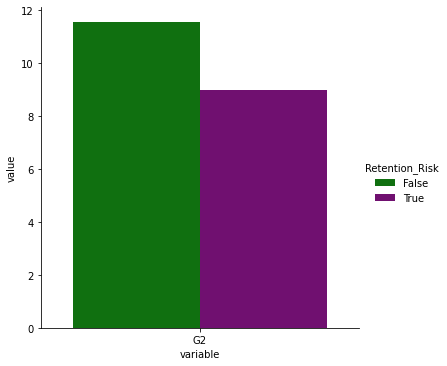

Student ID: 81


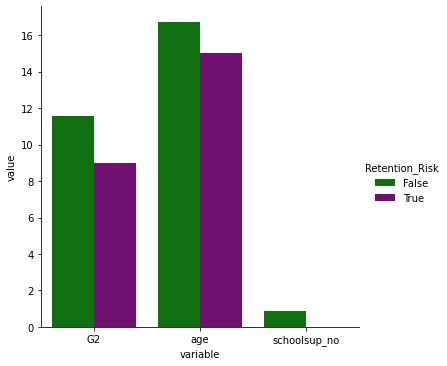

Student ID: 585


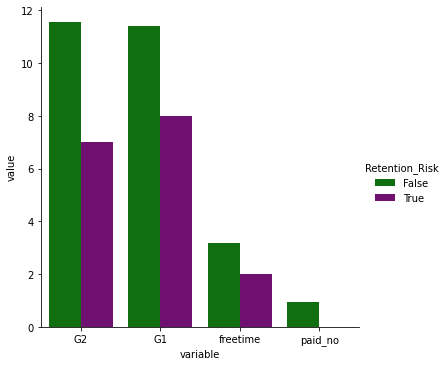

Student ID: 177


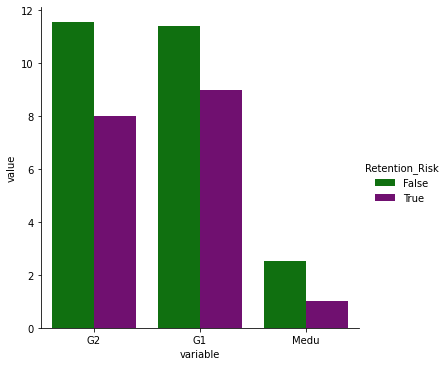

Student ID: 174


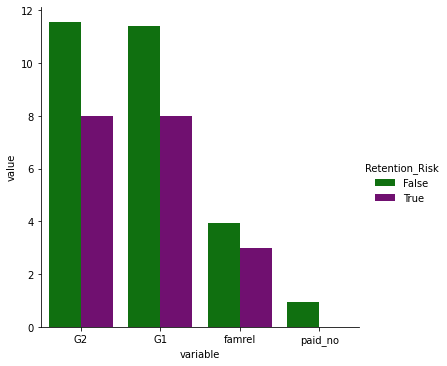

Student ID: 478


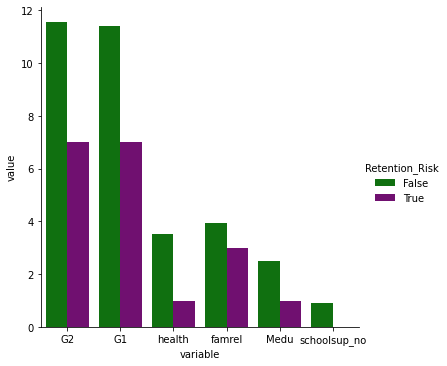

Student ID: 522


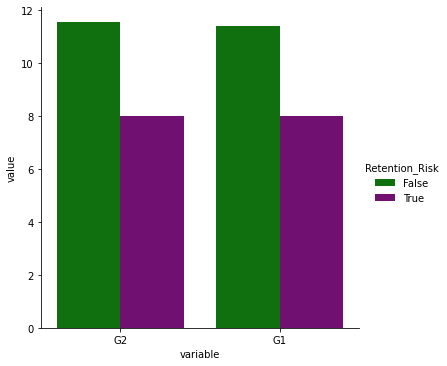

Student ID: 163


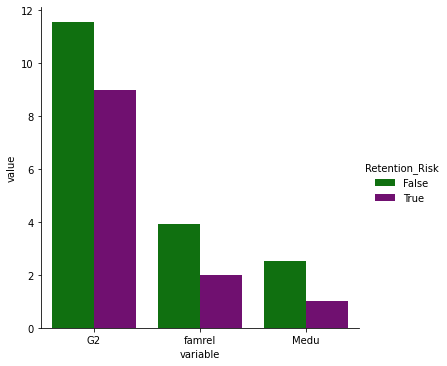

Student ID: 570


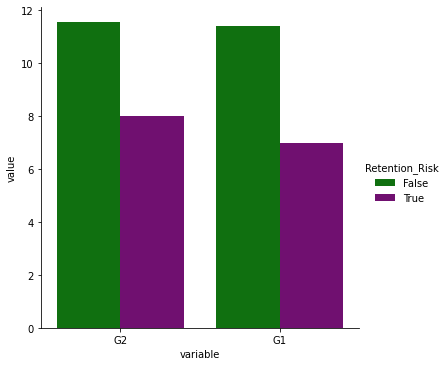

Student ID: 257


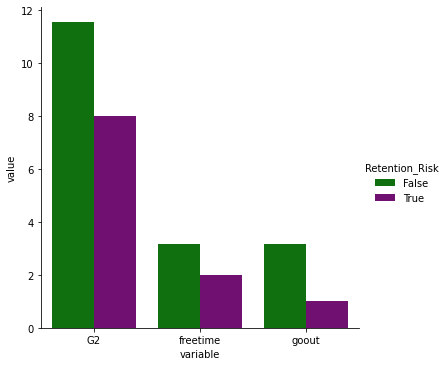

Student ID: 148


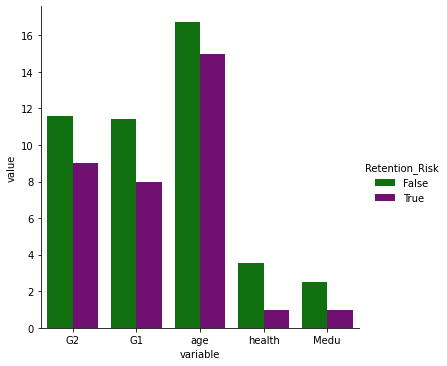

Student ID: 447


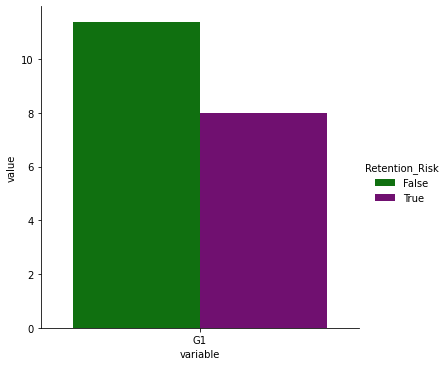

Student ID: 518


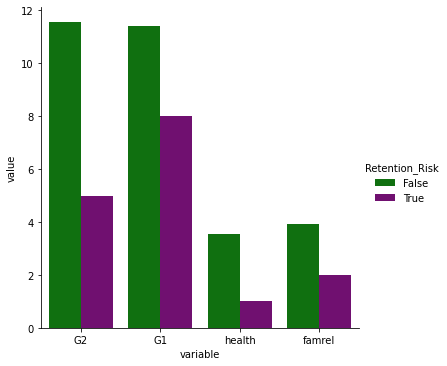

Student ID: 603


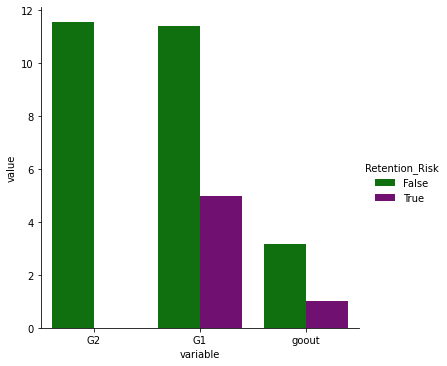

Student ID: 514


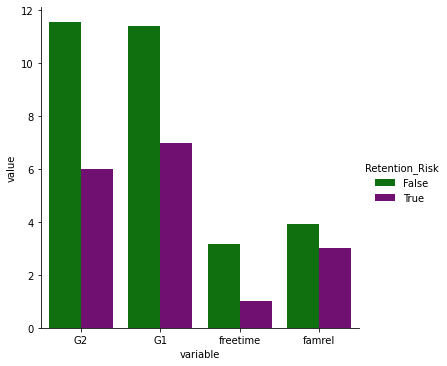

Student ID: 568


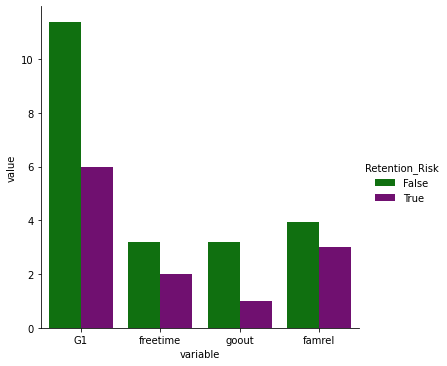

Student ID: 440


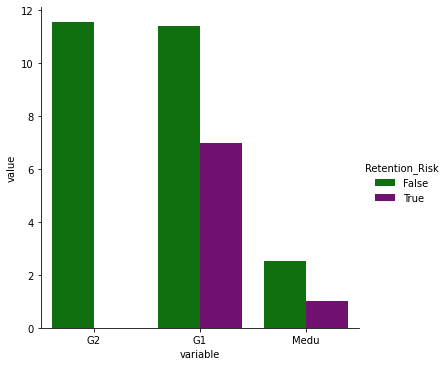

Student ID: 443


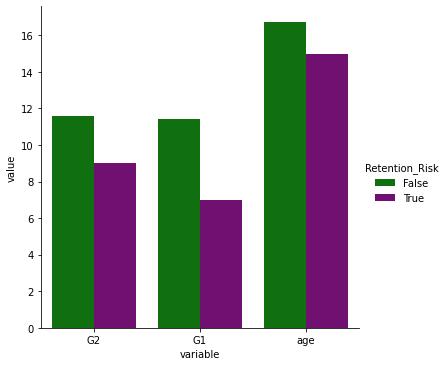

Student ID: 155


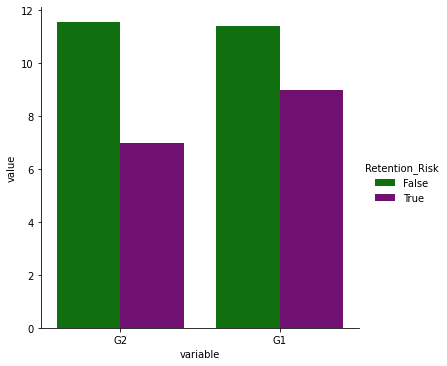

Student ID: 248


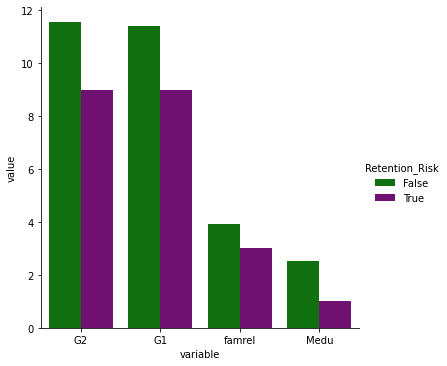

Student ID: 494


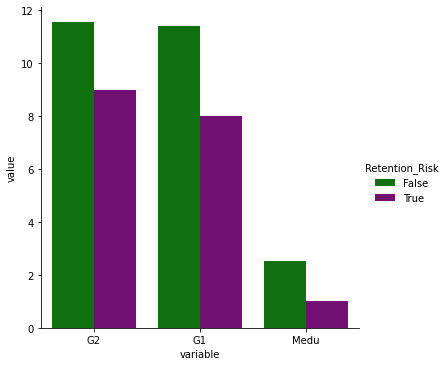

Student ID: 563


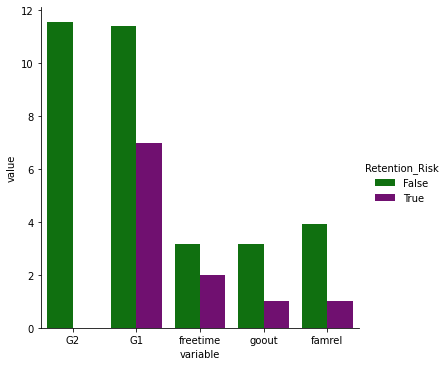

Student ID: 432


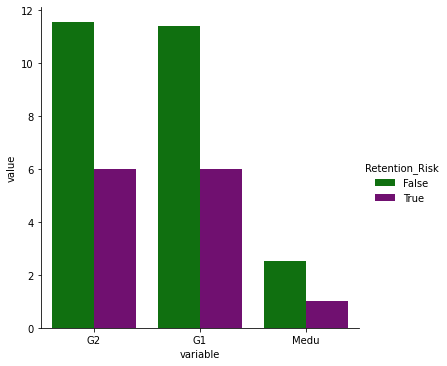

Student ID: 583


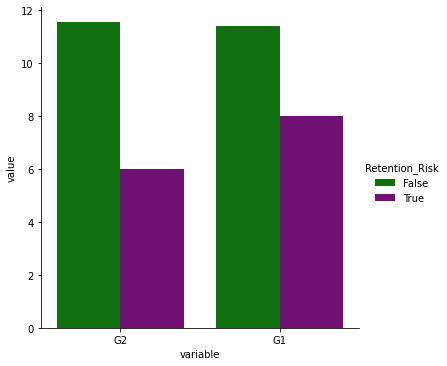

Student ID: 370


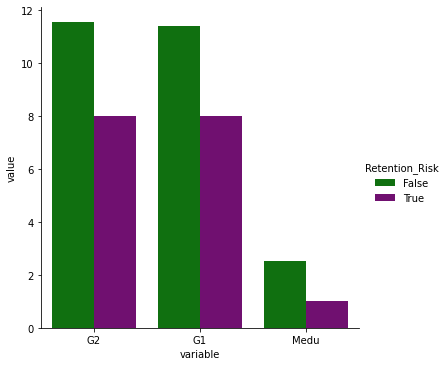

Student ID: 256


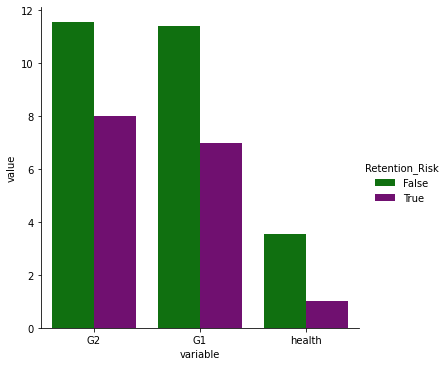

In [34]:
lower_limit_threshold = 0.25

# See which feature they landed well below or well above peers
for index, row in predicted_students_in_trouble.iterrows():
    student_id = index
    important_low_features = []
 
    for feat in key_features:
        if row[feat] < student_por_df[feat].quantile(lower_limit_threshold):
            important_low_features.append(feat)
    
    # create new data set for this student
    at_risk_student = pd.DataFrame(row[important_low_features]).T
    at_risk_student['Retention_Risk'] = True
    student_mean = pd.DataFrame(student_por_df[important_low_features].mean(axis=0)).T
    student_mean['Retention_Risk'] = False
    student_profile = pd.concat([at_risk_student,student_mean])
    student_profile = pd.melt(student_profile, id_vars="Retention_Risk")
    
    print('Student ID:', student_id)
    sns.catplot(x='variable', y='value', hue='Retention_Risk',data=student_profile, kind='bar', 
                palette=sns.color_palette(['green', 'purple']))

    plt.show()

Student ID: 131


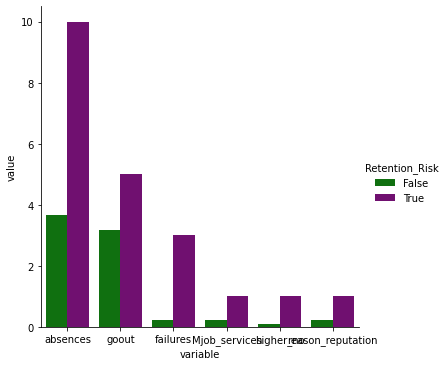

Student ID: 81


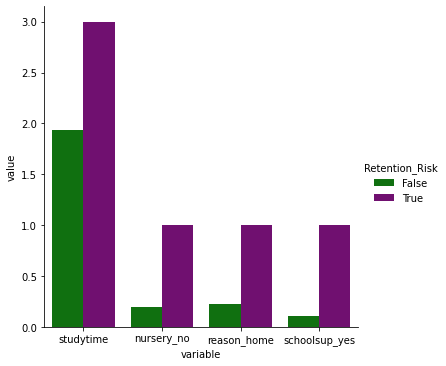

Student ID: 585


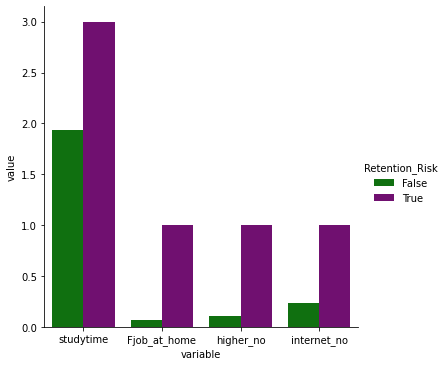

Student ID: 177


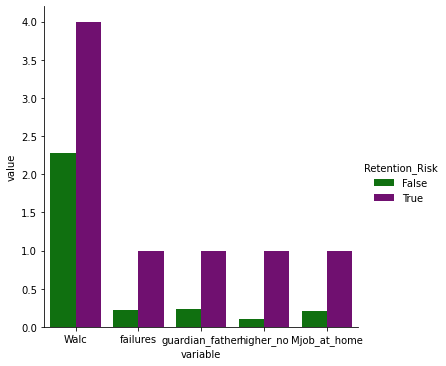

Student ID: 174


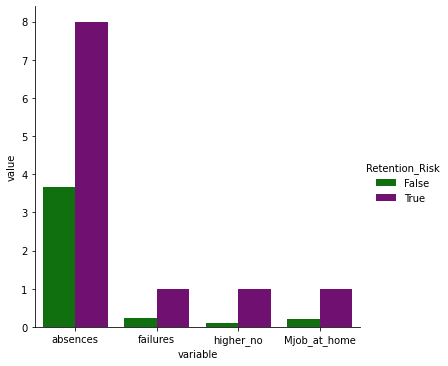

Student ID: 478


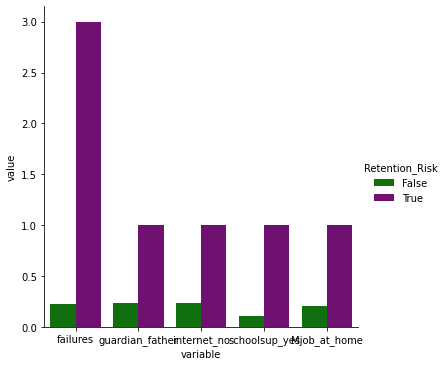

Student ID: 522


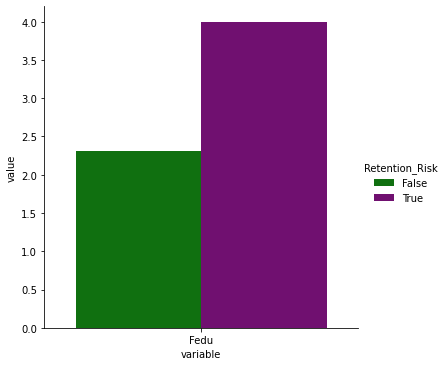

Student ID: 163


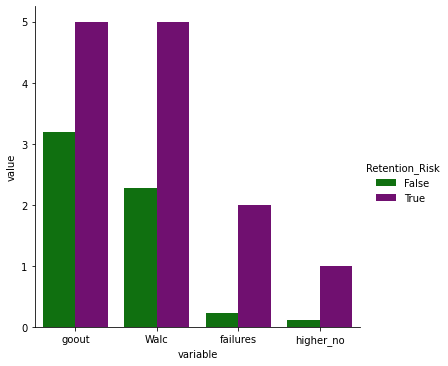

Student ID: 570


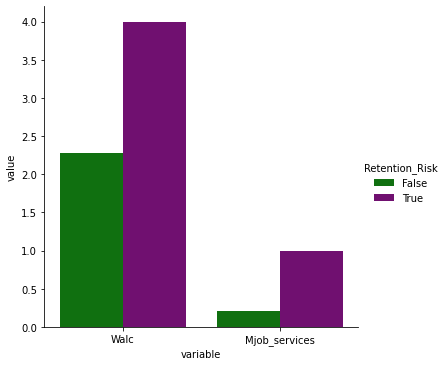

Student ID: 257


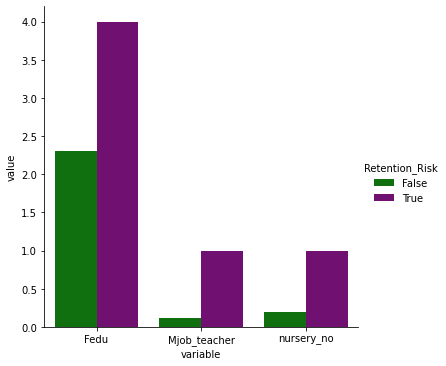

Student ID: 148


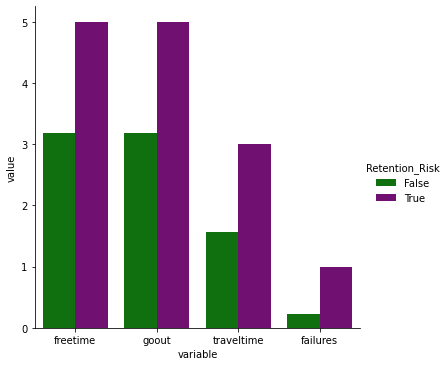

Student ID: 447


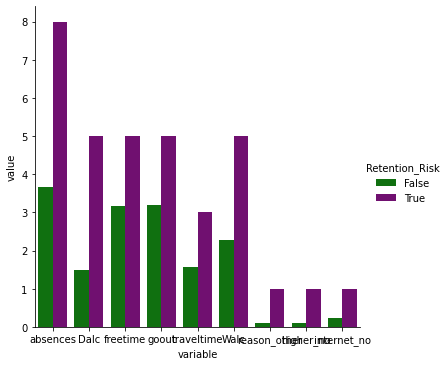

Student ID: 518


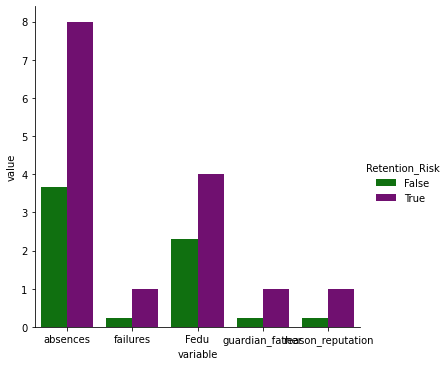

Student ID: 603


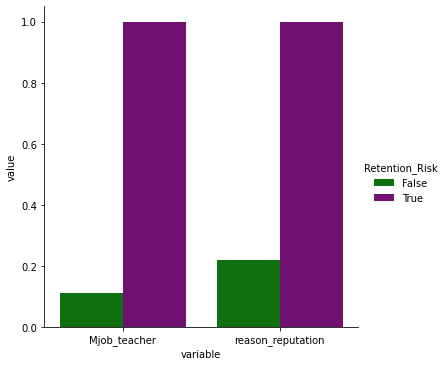

Student ID: 514


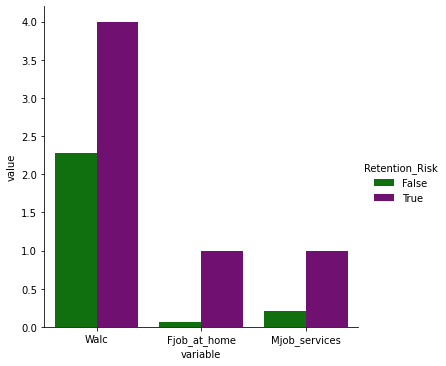

Student ID: 568


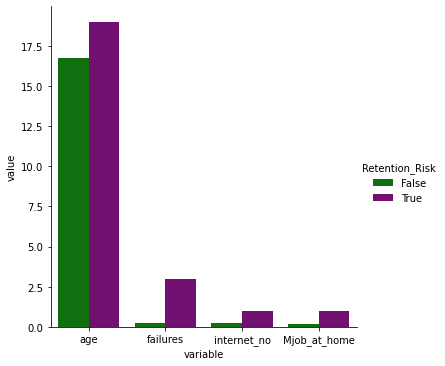

Student ID: 440


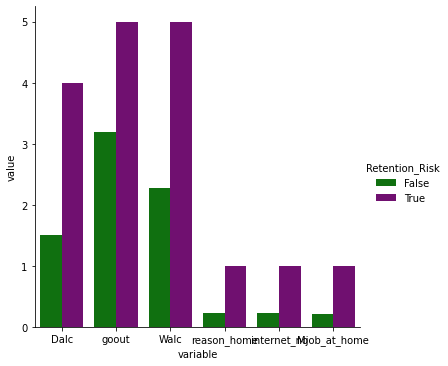

Student ID: 443


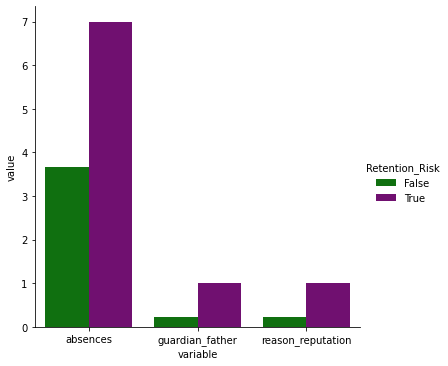

Student ID: 155


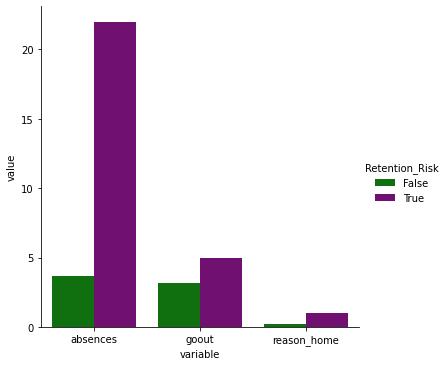

Student ID: 248


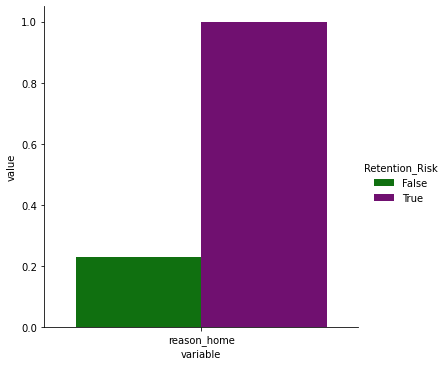

Student ID: 494


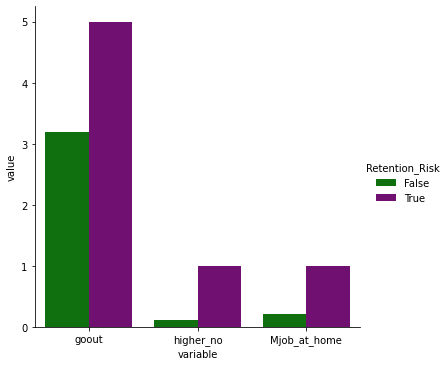

Student ID: 563


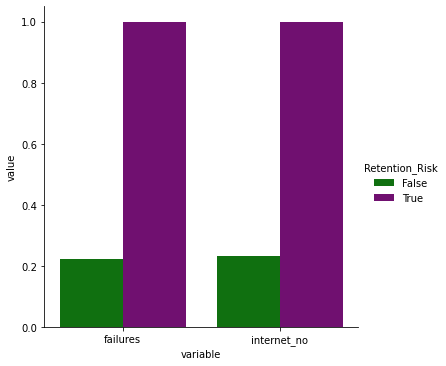

Student ID: 432


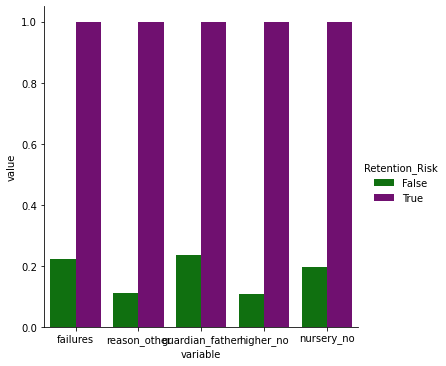

Student ID: 583


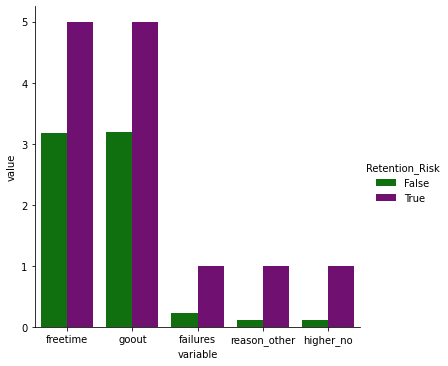

Student ID: 370


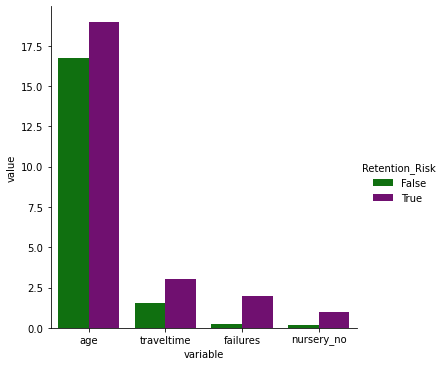

Student ID: 256


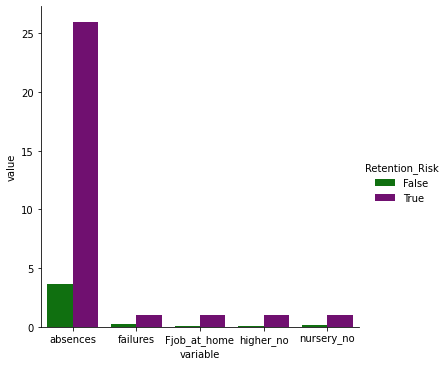

In [35]:
# See which feature they landed well below or well above peers
upper_limit_threshold = 0.75

for index, row in predicted_students_in_trouble.iterrows():
    student_id = index
    important_above_features = []
 
    for feat in key_features:
        if row[feat] > student_por_df[feat].quantile(upper_limit_threshold):
            important_above_features.append(feat)
            
        
    # create new data set for this student
    at_risk_student = pd.DataFrame(row[important_above_features]).T
    at_risk_student['Retention_Risk'] = True
    student_mean = pd.DataFrame(student_por_df[important_above_features].mean(axis=0)).T
    student_mean['Retention_Risk'] = False
    student_profile = pd.concat([at_risk_student,student_mean])
    student_profile = pd.melt(student_profile, id_vars="Retention_Risk")
    
    print('Student ID:', student_id)
    sns.catplot(x='variable', y='value', hue='Retention_Risk',data=student_profile, kind='bar', 
                palette=sns.color_palette(['green', 'purple']))
    plt.show()